In [22]:
import numpy as np
import os
import math
import h5py
import matplotlib.pyplot as plt


In [23]:
file_path_PT = "/zhisongqu_data/kyungtak/data_GBS/GBS_DN_tria/Equil_DN_PT_d0p6.h5"
file_path_NT = "/zhisongqu_data/kyungtak/data_GBS/GBS_DN_tria/Equil_DN_NT_dn0p6.h5"

In [24]:
# Open the HDF5 file
with h5py.File(file_path_NT, 'r') as hdf:
    # List all datasets inside the file
    print("Datasets in the file:")
    for name in hdf.keys():
        print(f" - {name}: {hdf[name].shape}, {hdf[name].dtype}")

    # Example: Read a dataset
    Psi_NT = np.array(hdf['psi_eq'][:])
    Yxpt_low_NT =  np.array(hdf["Yxpt_low"][:]) 
    Yxpt_up_NT =  np.array(hdf["Yxpt_up"][:]) 
    Xxpt_NT   =  np.array(hdf["Xxpt"][:]) 
    y0_source_NT   =  np.array(hdf["y0_source"][:]) 
    xmag_NT = np.array(hdf["xmag1"][:]) 
    #dpsidx
    dpsidx_v_NT   =  np.array(hdf["dpsidx_v"][:]) 
    dpsidy_v_NT   =  np.array(hdf["dpsidy_v"][:]) 
    dpsidx_n_NT   =  np.array(hdf["dpsidx_n"][:]) 
    dpsidy_n_NT   =  np.array(hdf["dpsidy_n"][:]) 
    # d2psi
    d2psidx2_v_NT   =  np.array(hdf["d2psidx2_v"][:]) 
    d2psidy2_v_NT   =  np.array(hdf["d2psidy2_v"][:]) 
    d2psidxdy_v_NT   =  np.array(hdf["d2psidxdy_v"][:]) 
    d2psidx2_n_NT   =  np.array(hdf["d2psidx2_n"][:]) 
    d2psidy2_n_NT   =  np.array(hdf["d2psidy2_n"][:]) 
    d2psidxdy_n_NT   =  np.array(hdf["d2psidxdy_n"][:]) 
    

Datasets in the file:
 - Xxpt: (1, 1), float64
 - Yxpt_low: (1, 1), float64
 - Yxpt_up: (1, 1), float64
 - d2psidx2_n: (324, 244), float64
 - d2psidx2_v: (324, 244), float64
 - d2psidxdy_n: (324, 244), float64
 - d2psidxdy_v: (324, 244), float64
 - d2psidy2_n: (324, 244), float64
 - d2psidy2_v: (324, 244), float64
 - dpsidx_n: (324, 244), float64
 - dpsidx_v: (324, 244), float64
 - dpsidy_n: (324, 244), float64
 - dpsidy_v: (324, 244), float64
 - psi_eq: (324, 244), float64
 - xmag1: (1, 1), float64
 - y0_source: (1, 1), float64


In [25]:
# Read PT    

# Open the HDF5 file
with h5py.File(file_path_PT, 'r') as hdf:
    # List all datasets inside the file
    print("Datasets in the file:")
    for name in hdf.keys():
        print(f" - {name}: {hdf[name].shape}, {hdf[name].dtype}")

    # Example: Read a dataset
    Psi_PT = np.array(hdf['psi_eq'][:])
    Yxpt_low_PT =  np.array(hdf["Yxpt_low"][:]) 
    Yxpt_up_PT =  np.array(hdf["Yxpt_up"][:]) 
    Xxpt_PT   =  np.array(hdf["Xxpt"][:]) 
    y0_source_PT   =  np.array(hdf["y0_source"][:]) 


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/zhisongqu_data/kyungtak/data_GBS/GBS_DN_tria/Equil_DN_PT_d0p6.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 40px;"><b> Grid parameters </b></span><br>
</div>

In [26]:
# Input Parameter
Lx = 600
Ly = 800
Nx = 244
Ny = 324

dx = Lx / (Nx-4)
dy = Ly / (Ny-4)

#xv = np.linspace(-3/2*dx, )
xv = np.arange(-3/2*dx, (Lx+3*dx/2)+1, dx)
yv = np.arange(-3/2*dy, (Ly+3*dy/2)+1, dy)
yn = np.arange(-1/2*dy, (Ly+5*dy/2)+1, dy)

# 2D meshgrid
Xv, Yv = np.meshgrid(xv,yv)
Xn, Yn = np.meshgrid(xv,yn)

X,Y = np.meshgrid(xv,yv)

ixxpt_NT = np.argmin(np.abs(xv - Xxpt_NT))
iyxpt_low_NT = np.argmin(np.abs(yn - Yxpt_low_NT))
iyxpt_up_NT = np.argmin(np.abs(yn - Yxpt_up_NT))


#ixxpt_PT = np.argmin(np.abs(xv - Xxpt_PT))
#iyxpt_low_PT = np.argmin(np.abs(yn - Yxpt_low_PT))
#iyxpt_up_PT = np.argmin(np.abs(yn - Yxpt_up_PT))


<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 40px;"><b> Plots </b></span><br>
</div>

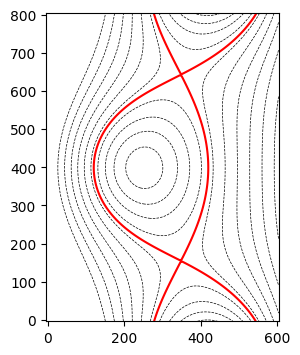

In [27]:
# IEEE journals typically require figures to be very clear at a column width of around 3.5 to 4 inches
fig_width = 3.5  # in inches
fig_height = fig_width / 1.618  # Golden ratio height for a single subplot

fig, axes = plt.subplots(ncols=2, figsize=(6,4), dpi=100)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

### DNT
levels_NT = np.arange(int(Psi_NT[int(len(Psi_NT)/2)][int(len(Psi_NT[0])/2)]), 
                   int(Psi_NT[int(len(Psi_NT)/2)][int(len(Psi_NT[0]))-1]),
                  int(Psi_NT[int(len(Psi_NT)/2)][int(len(Psi_NT[0])/2)])/200)
axes[0].contour(X, Y, Psi_NT, levels=levels_NT, linestyles='dashed', colors='k', linewidths=0.5)
axes[0].contour(X, Y, Psi_NT, levels=[Psi_NT[iyxpt_up_NT, ixxpt_NT]], colors='r')


NameError: name 'Psi_PT' is not defined

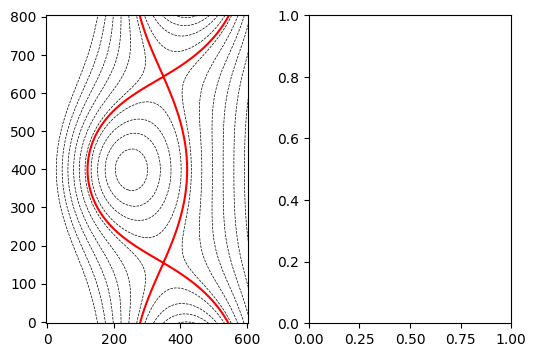

In [28]:
# IEEE journals typically require figures to be very clear at a column width of around 3.5 to 4 inches
fig_width = 3.5  # in inches
fig_height = fig_width / 1.618  # Golden ratio height for a single subplot

fig, axes = plt.subplots(ncols=2, figsize=(6,4), dpi=100)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

### DNT
levels_NT = np.arange(int(Psi_NT[int(len(Psi_NT)/2)][int(len(Psi_NT[0])/2)]), 
                   int(Psi_NT[int(len(Psi_NT)/2)][int(len(Psi_NT[0]))-1]),
                  int(Psi_NT[int(len(Psi_NT)/2)][int(len(Psi_NT[0])/2)])/200)
axes[0].contour(X, Y, Psi_NT, levels=levels_NT, linestyles='dashed', colors='k', linewidths=0.5)
axes[0].contour(X, Y, Psi_NT, levels=[Psi_NT[iyxpt_up_NT, ixxpt_NT]], colors='r')

### DNT
levels_PT = np.arange(int(Psi_PT[int(len(Psi_PT)/2)][int(len(Psi_PT[0])/2)]), 
                   int(Psi_PT[int(len(Psi_PT)/2)][int(len(Psi_PT[0]))-1]),
                  int(Psi_PT[int(len(Psi_PT)/2)][int(len(Psi_PT[0])/2)])/200)
axes[1].contour(X, Y, Psi_PT, levels=levels_PT, linestyles='dashed', colors='k', linewidths=0.5)
axes[1].contour(X, Y, Psi_PT, levels=[Psi_PT[iyxpt_up_PT, ixxpt_PT]], colors='r')

<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 40px;"><b> Generate 'equilibrium' files </b></span><br>
</div>

In [29]:
# Function to write 2D arrays row by row, full digits
def write_array(name, arr, file):
    rows, cols = arr.shape
    for i in range(-1, rows-1):
        row_idx = 0 if i == -1 else i
        # Print column header as -1:242 even though cols = 244
        file.write(f"{name}({i},-1:242) = ")
        values = " ".join(f"{v:.17f}" for v in arr[row_idx, :])  # Write full row
        file.write(f"{values}\n")

# Write file
with open('equilibrium', 'w') as f:
    f.write("&MAG_FIELD\n")

    # Write datasets
    write_array('psi_eq', Psi_NT, f)
    write_array('dpsidx_v', dpsidx_v_NT, f)
    write_array('dpsidy_v', dpsidy_v_NT, f)
    write_array('d2psidx2_v', d2psidx2_v_NT, f)
    write_array('d2psidy2_v', d2psidy2_v_NT, f)
    write_array('d2psidxdy_v', d2psidxdy_v_NT, f)
    write_array('dpsidx_n', dpsidx_n_NT, f)
    write_array('dpsidy_n', dpsidy_n_NT, f)
    write_array('d2psidx2_n', d2psidx2_n_NT, f)
    write_array('d2psidy2_n', d2psidy2_n_NT, f)
    write_array('d2psidxdy_n', d2psidxdy_n_NT, f)

    # Scalars, full digits
    f.write(f"xmag = {float(xmag_NT[0,0]):.17f}\n")
    f.write(f"y0_source = {float(y0_source_NT[0,0]):.17f}\n")
    f.write(f"Yxpt = {float(Yxpt_low_NT[0,0]):.17f}\n")
    f.write(f"Yxpt1 = {float(Yxpt_up_NT[0,0]):.17f}\n")

    f.write("/\n")

print("✅ File 'equilibrium' written with full digits (no scientific notation).")

✅ File 'equilibrium' written with full digits (no scientific notation).
